Abstract

The "Analyzing Fuel Consumption Using Regression" course is created to give participants the abilities and information required to do data-driven analyses of fuel consumption trends using regression techniques.

Introduction

This project seeks to investigate and comprehend the relationship between numerous elements impacting fuel efficiency, empowering them to make educated decisions and contribute to environmental sustainability. It places a strong emphasis on practical applications.

In [5]:
#Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [19]:
Fuel= pd.read_csv("C:/Users/Public/Documents/FuelConsumption.csv")

In [21]:
#Focus on the dataset
Fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration

In [22]:
#Summarize the dataset
Fuel.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [26]:
#Lets select some features to explore on the dataset
cdf=Fuel[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


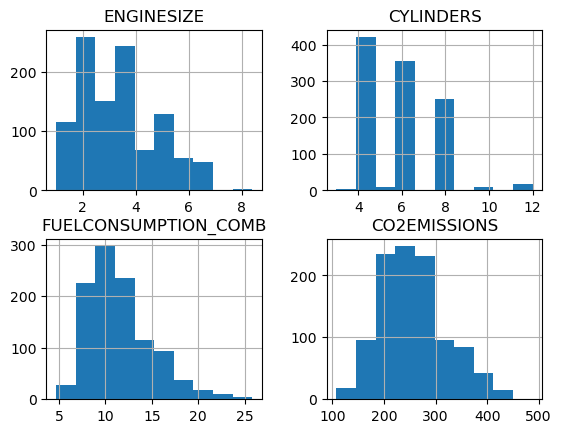

In [28]:
#Plot for dataset
viz=cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

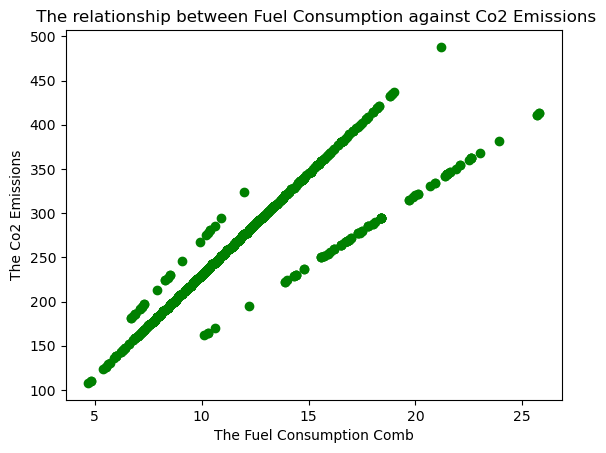

In [33]:
#Plot each feature against the Co2 Emission to establish their relationship
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='green')
plt.xlabel("The Fuel Consumption Comb")
plt.ylabel("The Co2 Emissions")
plt.title(" The relationship between Fuel Consumption against Co2 Emissions")
plt.show()

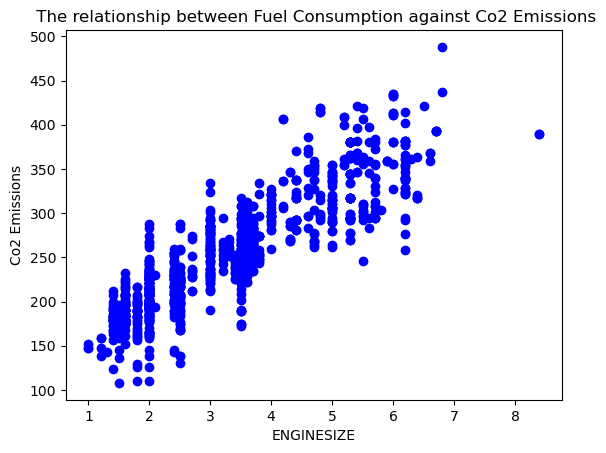

In [32]:
#Plot each feature against the Co2 Emission to establish their relationship
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Co2 Emissions")
plt.title(" The relationship between Fuel Consumption against Co2 Emissions")
plt.show()

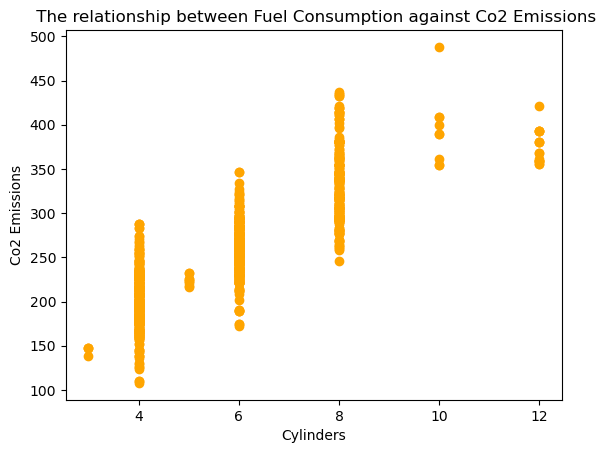

In [35]:
#Plot each feature against the Co2 Emission to establish their relationship
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='orange')
plt.xlabel("Cylinders")
plt.ylabel("Co2 Emissions")
plt.title(" The relationship between Fuel Consumption against Co2 Emissions")
plt.show()

# Creating train and test dataset
Train and test dataset involves splitting the dataset into training and testing sets that are mutually exclusive. This will provide a more accurate evaluation on out of sample accuracy because the testing  is not part of the dataeset that has been used to train the model. This gives a better understanding of how well our model generalizes on new data. Since we know the outcome of the dataset making it great to work with. We split the dataset into 80% training set and 20% testing data.

In [37]:
mask= np.random.rand(len(Fuel))<0.8

In [39]:
train=cdf[mask]
test= cdf[mask]

Simple linear regression fits a linear model with coefficients B=(Bo.....Bn) to minimize the residual sum of squares between the actual value y in the dataset and the predicted value Yhat using linear approxiamtion

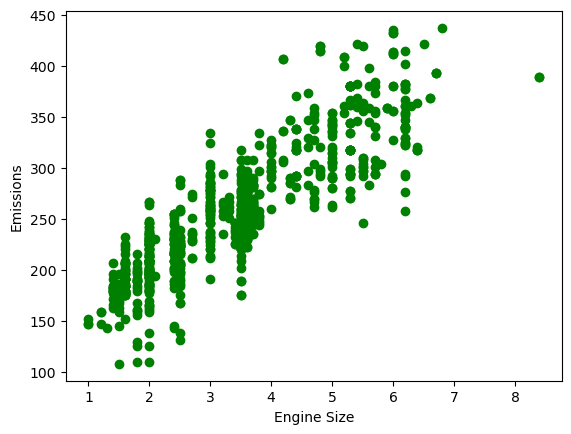

In [40]:
#Train Data Distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="green")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

Modelling

In [41]:
from sklearn import linear_model
regr= linear_model.LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y= np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
#The Coeffiecients
print("The Coefficients:", regr.coef_)
print("The Intercept:", regr.intercept_)

The Coefficients: [[38.40640174]]
The Intercept: [127.84572941]


#As mentioned earlier the coefficients and intercept are parameters of the fit line. 


Text(0, 0.5, 'Emissions')

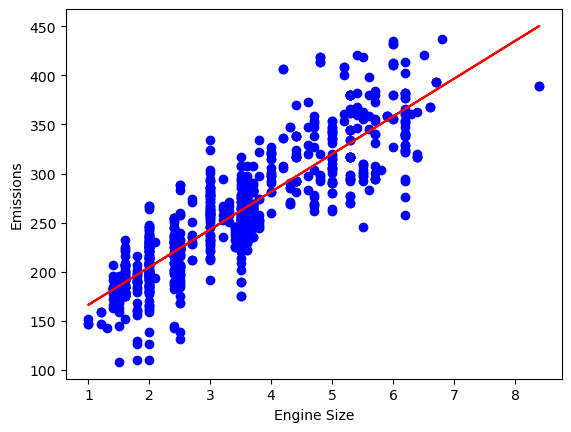

In [43]:
# Plot the Ouputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'r')
plt.xlabel("Engine Size")
plt.ylabel("Emissions")

Evaluations

We compare the Actual values and the predicted values to calcuate the accuracy of the regression model. Evaluation metrics provide a key role in development of a model as it provides insight to areas that require improvement. There are different model evaluation metrics . These include;
1. Mean Absolute Error- It is the mean absolute value of the errors. This is the easiest of the metrics to understand since it's just the average error.
2. Mean squared error- Is the mean of squared error. Focus is geared towards large errors. This is due to squared term exponentially increasing large errors in comparison to smaller ones. 
3. Root mean squared error- Is a popular metric to measure the performance of the regression model. It represents how close the data points are to the fitted regression line. The higher the R squared values, the better the model fits your data. The best score is 1.0 and it can be negative  

In [44]:
from sklearn.metrics import r2_score
test_x= np.asanyarray(test[['ENGINESIZE']])
test_y= np.asanyarray(test[['CO2EMISSIONS']])
test_y= regr.predict(test_x)
print("Mean Absolute Error:%2f" % np.mean(np.absolute(test_y -test_x)))
print("Residual Sum of squares: %2f" % np.mean((test_y -test_x)**2))
print("R2-Score: %.2f" % r2_score(test_y, test_x))

Mean Absolute Error:254.898814
Residual Sum of squares: 67831.603856
R2-Score: -21.51


# Multiple Linear Regression

In [47]:
from sklearn import linear_model
regr= linear_model.LinearRegression()
x= np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y= np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#The coefficient
print("The coefficients is:", regr.coef_)

The coefficients is: [[10.32484146  7.62472196  9.66532806]]


#Ordinary Least Squares
OLS is a method for estimating the unknown parameters in a linear regression model. OLS choose the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the difference between the target dependent variable and those predicted by the linear function. In other words, it tries to minimize the sum of squares error or mean square error between the target variable (y) and the predicted output(yhat) over all samples in the dataset. 

Prediction

In [49]:
y_hat=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat-y)**2))
#Explained Variance score: 1 is perfect prediction
print("Variance score: % 2f" % regr.score(x,y))

Residual sum of squares: 545.35
Variance score:  0.862611


C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
